In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
insurance_df = pd.read_csv('/content/sample_data/insurance.csv')
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [56]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [57]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
insurance_df.shape

(1338, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


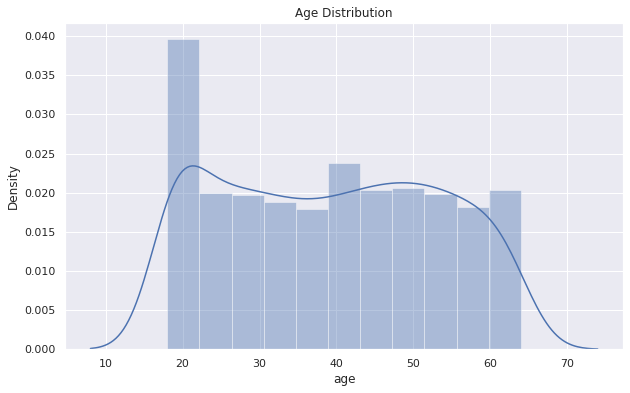

In [60]:
#sns.set()
plt.figure(figsize=(10,6))
sns.distplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


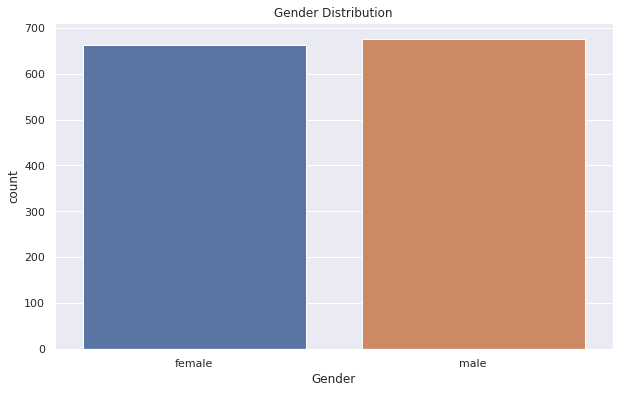

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(insurance_df['sex'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

In [62]:
insurance_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


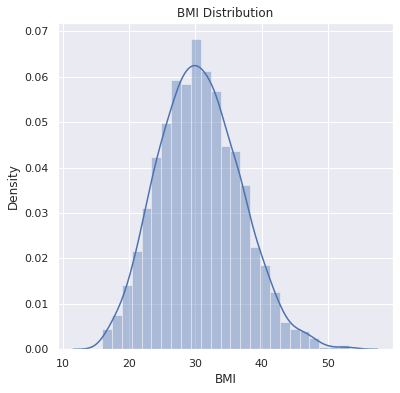

In [63]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['bmi'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Children')

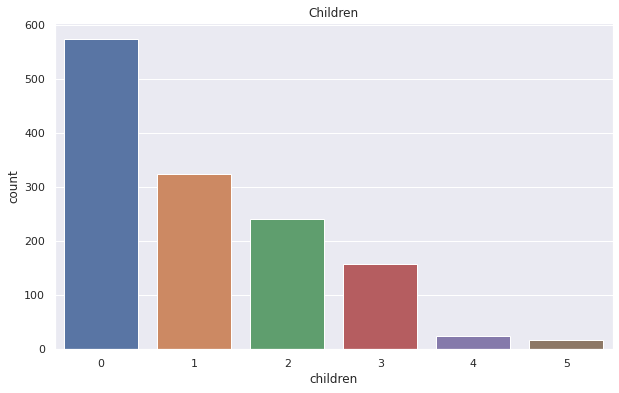

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(insurance_df['children'])
plt.title('Children')

In [65]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


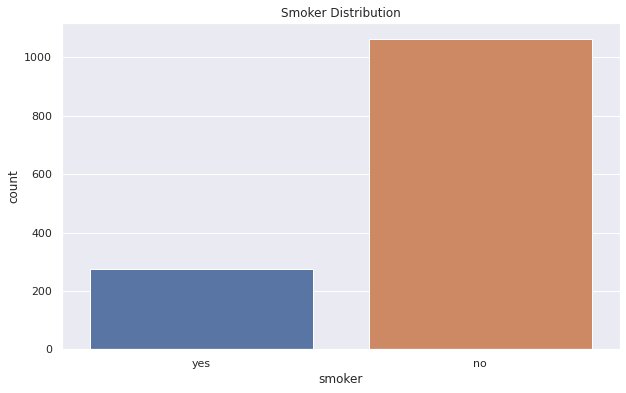

In [66]:
plt.figure(figsize=(10,6))
plt.title('Smoker Distribution')
sns.countplot(insurance_df['smoker'])

In [67]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [68]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


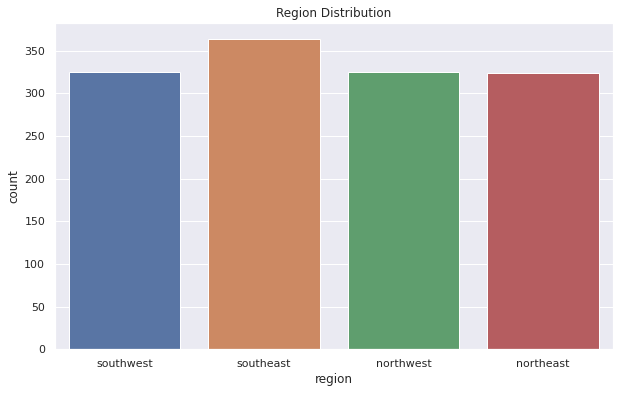

In [69]:
plt.figure(figsize=(10,6))
plt.title('Region Distribution')
sns.countplot(insurance_df['region'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Charges Distribution')

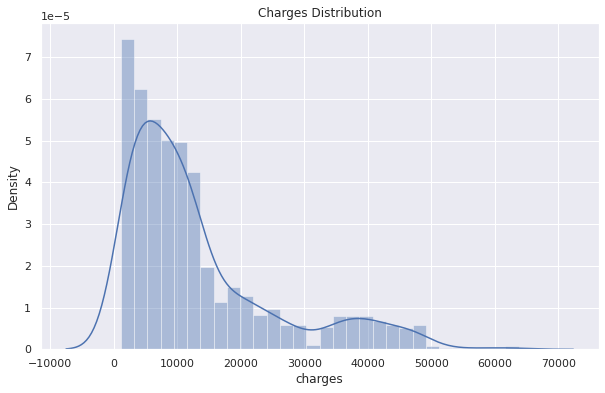

In [70]:
plt.figure(figsize=(10,6))
sns.distplot(insurance_df['charges'])
plt.title('Charges Distribution')

In [71]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [72]:
insurance_df.replace({'sex':{'male':0, 'female':1}, 'smoker':{'yes':1, 'no':0}, 
                      'region': {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}},inplace=True)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [73]:
insurance_df['region'].unique()

array([0, 1, 2, 3])

In [74]:
x = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [75]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [77]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [78]:
train_pred = regressor.predict(x_train)
r2_train = metrics.r2_score(y_train, train_pred)
print('Training r2 score is : ', r2_train)

Training r2 score is :  0.7519923667088932


In [79]:
test_pred = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test, test_pred)
print('Training r2 score is : ',r2_test)

Training r2 score is :  0.7445422986536503


In [84]:
input_data = (61,1,25.74,0,1,0)
input_data_array = np.asarray(input_data)
input_data_array_reshape = input_data_array.reshape(1,-1)
predict = regressor.predict(input_data_array_reshape)
print('Insurance premium would be : ',predict[0])

Insurance premium would be :  35034.792611026045


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
